## Final Project Submission

Please fill out:
* Student name:  JOSEPH  HINGA MWANGI
* Student pace: self paced / part time / full time :FULL TIME
* Scheduled project review date/time: 
* Instructor name: LUCILE MWIKALI
* Blog post URL:



# MICROSOFT MOVIE ANALYSIS

# 1. Business Understanding

# 1.1 Overview
Microsoft Corporation is a multinational technology corporation best known for its software, services, and hardware. Microsoft, founded in 1975, has played a critical role in defining the digital landscape. It creates and licenses a variety of products, including the Windows operating system, the Office productivity suite, the Azure cloud platform, developer tools, and Xbox gaming consoles. Individuals, businesses, and developers can benefit from Microsoft's offerings, which enable them to increase productivity, build new solutions, and interact with others in the digital world. Microsoft remains a prominent force in the technology industry, with a commitment to pushing technological improvements and a focus on empowering people.


# 1.2 Problem Statement
Microsoft is new to the movie industry and lacks expertise. By analyzing box office data, we aim to identify key factors for a movie's success. Our goal is to provide strategic guidance to Microsoft's movie studio on the types of films they should produce to increase their chances of success.

# 1.3 Objectives
To identify the best performing film in the industry To establish movies with the highest rating To

# 1.4 Buisness Success Criteria
using exploratory data analysis to come up wih insights on movies in order to recommend microsoft on proper ways in which they can incoperate to make thier movies a success
# 2. Data Understanding
The datasets have been provided and the goal is to explore the general structure of the datasets and to verify the quality of the data.

Importing libraries


In [3]:
# import necessary libraries

# data understanding
import pandas as pd
import numpy as np

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

loading data

In [4]:
# Rotten Tomatoes
rt_movies = pd.read_csv("rt.movie_info.tsv", sep='\t')
# review
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# IMDB
import sqlite3
# load data
conn = sqlite3.connect("im.db")

imdb_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [9]:
# IMDB
imdb = pd.read_sql("""
SELECT a.primary_title,
 a.original_title,
 a.start_year,
 a.runtime_minutes,
 a.genres,
 b.averagerating,
 b.numvotes,
 c.person_id,
 d.primary_name
 
 FROM movie_basics as a
 JOIN movie_ratings as b
 ON b.movie_id = a.movie_id
 JOIN directors as c
 ON b.movie_id = c.movie_id
 JOIN persons as d
 ON c.person_id = d.person_id;
""", conn)
imdb

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul
...,...,...,...,...,...,...,...,...,...
181382,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181383,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181384,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou
181385,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou


#2.1.1 Rotten Tomatoes

In [11]:
# columns
rt_movies.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [12]:
# shape
rt_movies.shape

(1560, 12)

In [13]:
# descriptive statistics
rt_movies.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [14]:
# data structure
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [15]:
# checking for missing data
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [16]:
# checking for duplicates
rt_movies.duplicated().sum()

0

In [17]:
# unique ratings
rt_movies['rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [18]:
# rating count
rt_movies['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

# 2.1.2 IMDB

In [23]:


# columns
imdb.columns


Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'person_id', 'primary_name'],
      dtype='object')

In [24]:
# shape
imdb.shape


(181387, 9)

In [25]:
# descriptive statistics
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,181387.000000,163584.000000,181387.000000,1.813870e+05
mean,2014.309802,97.789484,6.217683,4.955524e+03
std,2.536111,194.434689,1.388026,3.760931e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,84.000000,5.400000,1.900000e+01
50%,2014.000000,94.000000,6.300000,6.600000e+01
75%,2016.000000,107.000000,7.200000,3.110000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [26]:
# data structure
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    181387 non-null  object 
 1   original_title   181387 non-null  object 
 2   start_year       181387 non-null  int64  
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
 6   numvotes         181387 non-null  int64  
 7   person_id        181387 non-null  object 
 8   primary_name     181387 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.5+ MB


In [27]:
# checking for missing data
imdb.isna().sum()

primary_title          0
original_title         0
start_year             0
runtime_minutes    17803
genres              1340
averagerating          0
numvotes               0
person_id              0
primary_name           0
dtype: int64

In [28]:
# checking for d
# checking for duplicates
imdb.duplicated().sum()

95357

# 3. Data Preparation

# 3.1 Rotten Tomatoes

In [31]:
rt_movies.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [32]:
# dropping unwanted columns
rt_movies.drop(['id', 'currency', 'box_office', 'dvd_date'], inplace=True, axis=1)

In [33]:
rt_movies.head()

,synopsis,rating,genre,director,writer,theater_date,runtime,studio
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",104 minutes,NaN
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",116 minutes,NaN
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",128 minutes,NaN
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200 minutes,NaN


In [34]:
# dropping null values in the table
rt_movies.dropna(subset=['synopsis', 'theater_date', 'studio', 'director', 'writer', 'runtime'], inplace=True)

In [35]:
# changing theater_ data type from object to date-time
rt_movies['theater_date'] = pd.to_datetime(rt_movies['theater_date'])

In [36]:
# Separate theater date  into date, month, and year columns
rt_movies['Day'] = rt_movies['theater_date'].dt.day
rt_movies['Month'] = rt_movies['theater_date'].dt.month
rt_movies['Year'] = rt_movies['theater_date'].dt.year

In [37]:
# dealing with missing values
rt_movies['Day'].isna().sum()

0

In [38]:
# Remove 'minutes' part
rt_movies['runtime'] = rt_movies['runtime'].str.replace(' minutes', '')

# Check the updated DataFrame
rt_movies.head()

,synopsis,rating,genre,director,writer,theater_date,runtime,studio,Day,Month,Year
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,Entertainment One,17,8,2012
5,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,95,Warner Bros. Pictures,3,3,2000
6,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,82,Paramount Pictures,11,1,2002
7,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,123,Sony Pictures Classics,27,4,2006
15,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,108,ATO Pictures,17,12,2010


In [39]:
# checking for any other missing values
rt_movies.isna().sum()

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
runtime         0
studio          0
Day             0
Month           0
Year            0
dtype: int64

# 3.2 imdb

In [41]:
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul


In [42]:
# dropping unwanted columns
imdb.drop(['primary_title', 'person_id', 'primary_name'], inplace=True, axis=1)
imdb.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
2,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
4,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [43]:
imdb.isna().sum()

original_title         0
start_year             0
runtime_minutes    17803
genres              1340
averagerating          0
numvotes               0
dtype: int64

In [44]:
# dropping null values in the table
imdb.dropna(subset=['runtime_minutes', 'genres'], inplace=True)

# 4. Exploratory Data Analysis

# 4.1 Rotten Tomatoes

In [48]:
rt_movies.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'runtime', 'studio', 'Day', 'Month', 'Year'],
      dtype='object')

In [49]:
# highest rating with most votes
rt_movies['rating'].value_counts()

R        152
PG-13    106
PG        60
NR        29
G          9
NC17       1
Name: rating, dtype: int64

<AxesSubplot:>

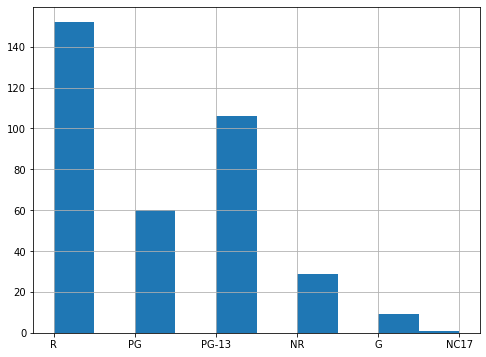

In [50]:
#distribution plot for rating
rt_movies['rating'].hist(figsize=(8,6))

In [51]:
# 
top_genres=rt_movies['genre'].value_counts()
top_genres

Drama                                                                      49
Comedy                                                                     40
Comedy|Drama                                                               28
Drama|Mystery and Suspense                                                 17
Comedy|Romance                                                             12
                                                                           ..
Drama|Mystery and Suspense|Science Fiction and Fantasy                      1
Horror|Kids and Family|Mystery and Suspense|Science Fiction and Fantasy     1
Art House and International|Drama|Mystery and Suspense                      1
Action and Adventure|Mystery and Suspense|Romance                           1
Action and Adventure                                                        1
Name: genre, Length: 102, dtype: int64

In [52]:
# top 10 genres
top_genres = rt_movies['genre'].value_counts().rename_axis('genre').reset_index(name='counts')
genres = top_genres.iloc[:10]

<AxesSubplot:title={'center':'Popular Genres'}, xlabel='genre'>

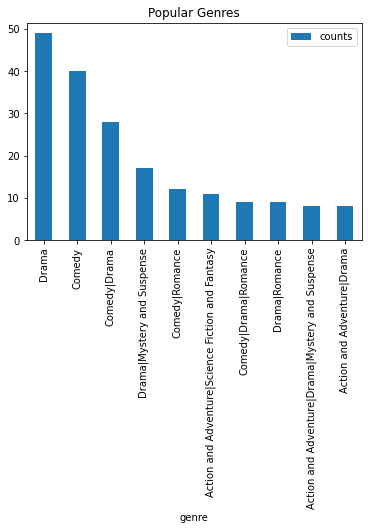

In [53]:
# distribution plot for top 10 genres
genres.plot.bar(x = 'genre', title = 'Popular Genres')

In [54]:
# highest rating with most votes
directors=rt_movies['director'].value_counts()
directors

Steven Spielberg      5
Sylvester Stallone    3
David Fincher         3
Clint Eastwood        3
Bryan Singer          2
                     ..
Steve Carr            1
Ryan Murphy           1
Tate Taylor           1
Trish Sie             1
Jake Kasdan           1
Name: director, Length: 326, dtype: int64

In [55]:
# top 10 directors
top_directors = rt_movies['director'].value_counts().rename_axis('director').reset_index(name='counts')
directors = top_directors.iloc[:10]

<AxesSubplot:title={'center':'Popular Director'}, xlabel='director'>

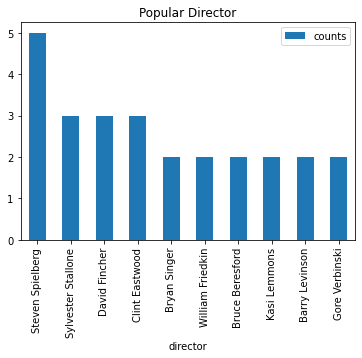

In [56]:
# distribution plot for top 10 directors
directors.plot.bar(x = 'director', title = 'Popular Director')

In [57]:
month_counts = rt_movies['Month'].value_counts()
month_counts

12    37
8     36
11    34
10    33
6     30
4     30
3     29
9     27
1     27
7     26
2     26
5     22
Name: Month, dtype: int64

<AxesSubplot:title={'center':'Total Movies per Theater Month'}>

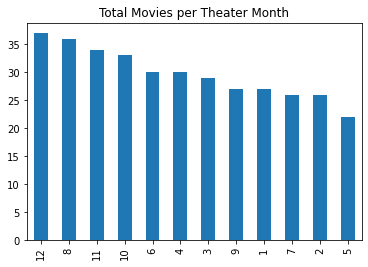

In [58]:
# distribution plot for top 10 directors
month_counts.plot.bar(x = 'month', title = 'Total Movies per Theater Month')


# 4.2 IMDB

In [60]:
imdb.columns

Index(['original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [61]:
year = imdb['start_year'].value_counts()
year

2014    23065
2016    22442
2015    18912
2017    17673
2011    17394
2013    16827
2012    15313
2018    14241
2010    13284
2019     3557
Name: start_year, dtype: int64

<AxesSubplot:title={'center':'distribution per year'}>

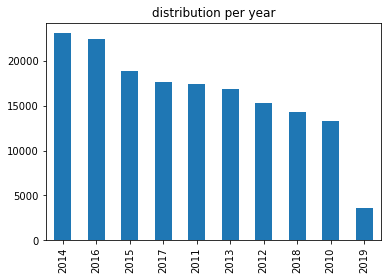

In [62]:
year.plot.bar(x = 'start_year', title= 'distribution per year')

In [63]:
runtime = imdb['runtime_minutes'].value_counts()
runtime_mins = runtime.iloc[:10]
runtime_mins

90.0     10341
94.0      5827
98.0      5304
89.0      4875
95.0      4596
85.0      4567
97.0      4393
100.0     4386
80.0      4028
142.0     4011
Name: runtime_minutes, dtype: int64

<AxesSubplot:title={'center':'Distribution per Runtime'}>

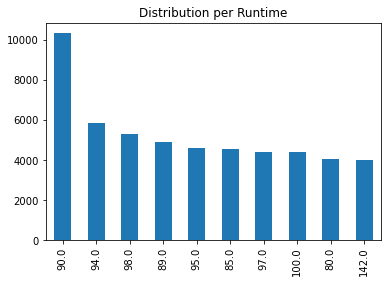

In [64]:
runtime_mins.plot.bar(x = 'runtime_minutes', title='Distribution per Runtime')

In [65]:
rating = imdb['averagerating'].value_counts()
rating = rating.iloc[:10]
rating 

7.2    7966
7.0    6645
5.8    6202
6.5    5731
5.7    5378
6.6    5277
5.9    5170
6.7    4568
5.4    4535
6.8    4463
Name: averagerating, dtype: int64

<AxesSubplot:title={'center':'distribution of movie rating'}>

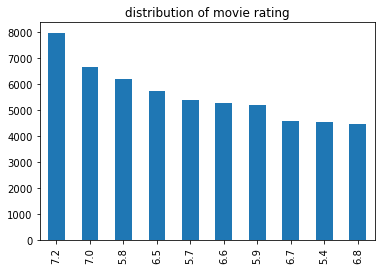

In [66]:
rating.plot.bar(x = 'averagerating', title= 'distribution of movie rating')

# Conclusions

-Most movies are rated as restricted(R) while the least are rated No One 17 and Under Admitted (NC 17).
Majority of the movies produced are comedy and drama.
Steven Spielberg is the most prefered movie director.
Most movie theater are scheduled towards the end of the year.
from the analysis, most movies produced began in 2014.
Over 10,000 movies have a runtime of 90 minutes.
Majority of the movies have an average rating of 7.2

# Recommendations

Based on the findings from Exploratory Data Analysis of movies, Microsoft company should maximize on producing Drama and Comedy movies with a runtime of 90 minutes, using Steven Spielberg as the Director. Microsoft should also release their movies on theaters during the last quarter of the year.